In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import altair as alt
from vega_datasets import data
import random
alt.__version__

'5.3.0'

In [12]:
!pip install -U altair
import altair as alt
alt.__version__

'5.3.0'

In [13]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


##Exploratory Data Analysis and Preprocessing

In this section I am exploring the data provided to us and perform if needed some preprocessing.

In [14]:
top_artists = pd.read_excel('/content/drive/MyDrive/Data_Vis/project 2/topArtists.xlsx')
top_artists.head()

,Artist,Album,Year,Songs,Sales
0,Taylor Swift,Taylor Swift,2006,13,7275000
1,Taylor Swift,Fearless,2008,13,11911000
2,Taylor Swift,Speak Now,2010,14,6917500
3,Taylor Swift,Red,2012,16,8889124
4,Taylor Swift,1989,2014,13,14748116


In [15]:
top_artists.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Artist  81 non-null     object
 1   Album   81 non-null     object
 2   Year    81 non-null     int64 
 3   Songs   48 non-null     object
 4   Sales   81 non-null     int64 
dtypes: int64(2), object(3)
memory usage: 3.3+ KB


In [16]:
top_artists['Artist'].value_counts()  # nof albums of each artist

Artist
Taylor Swift     13
The Weeknd        9
Justin Bieber     9
Lady Gaga         8
Rihanna           8
Shakira           8
Drake             7
Ariana Grande     6
Post Malone       5
Ed Sheeran        5
Billie Eilish     3
Name: count, dtype: int64

In [17]:
top_artists['Album'].value_counts()   # there is no duplicated album

Album
Taylor Swift            1
Joanne                  1
+                       1
Trilogy                 1
The highlights          1
                       ..
Nothing Was the Same    1
Take Care               1
Thank Me Later          1
Positions               1
MTV Umplugged           1
Name: count, Length: 81, dtype: int64

In [18]:
top_artists['Year'].value_counts()    # distribution of year release

Year
2021    7
2011    7
2016    6
2010    6
2017    5
2019    5
2020    5
2018    5
2013    5
2012    4
2014    4
2022    4
2015    3
2005    3
2009    2
2006    2
2008    2
2007    1
2023    1
2001    1
1995    1
1998    1
2000    1
Name: count, dtype: int64

(array([ 1.,  2.,  1.,  5.,  3., 15., 13., 14., 15., 12.]),
 array([1995. , 1997.8, 2000.6, 2003.4, 2006.2, 2009. , 2011.8, 2014.6,
        2017.4, 2020.2, 2023. ]),
 <BarContainer object of 10 artists>)

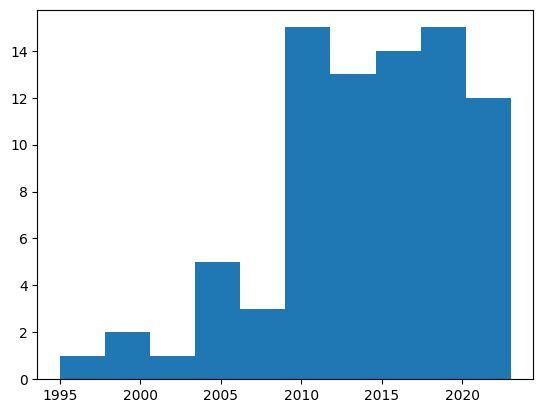

In [19]:
plt.hist(top_artists['Year'])   # distribution of year release in a histogram

(array([17., 15., 17.,  5., 12.,  5.,  0.,  1.,  4.,  5.]),
 array([  180000. ,  1636811.6,  3093623.2,  4550434.8,  6007246.4,
         7464058. ,  8920869.6, 10377681.2, 11834492.8, 13291304.4,
        14748116. ]),
 <BarContainer object of 10 artists>)

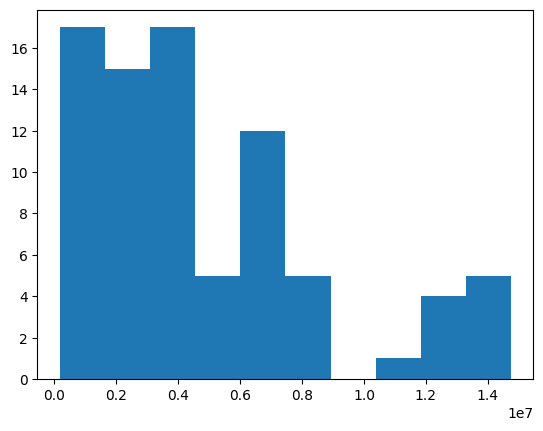

In [20]:
plt.hist(top_artists['Sales'])  # distribution of album sales in a histogram

{'whiskers': [<matplotlib.lines.Line2D at 0x7c0d60707160>,
 'caps': [<matplotlib.lines.Line2D at 0x7c0d60707580>,
 'boxes': [<matplotlib.lines.Line2D at 0x7c0d60706ec0>],
 'medians': [<matplotlib.lines.Line2D at 0x7c0d60707ac0>],
 'fliers': [<matplotlib.lines.Line2D at 0x7c0d60707d60>],
 'means': []}

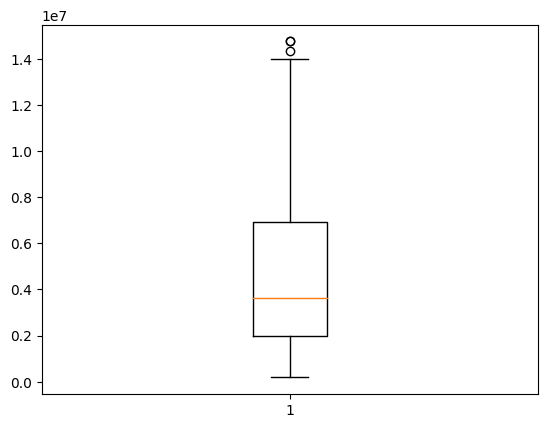

In [21]:
plt.boxplot(top_artists['Sales']) # distribution of year release in a boxplot

In [22]:
top_artists['Songs'].value_counts()   # distribution of nof songs in all the albums

Songs
12    10
13     8
14     7
15     4
11     4
17     3
16     2
18     2
20     2
       2
30     1
25     1
8      1
6      1
Name: count, dtype: int64

In [23]:
top_artists[top_artists['Songs']==" "]    # there are two observations with a whitespace in the songs column

,Artist,Album,Year,Songs,Sales
51,The Weeknd,Dawn FM,2022,,340000
68,Justin Bieber,My World,2010,,3980000


In [24]:
top_artists = top_artists.replace(r'^\s*$', np.nan, regex=True)   # replace these two empty observations with NaN

In [25]:
top_artists[top_artists['Songs'].isna()]    # There are 35 observations with NaN in the songs column.

,Artist,Album,Year,Songs,Sales
7,Taylor Swift,floklore (deluxe version),2020,NaN,4360487
8,Taylor Swift,midnights,2022,NaN,3387836
11,Taylor Swift,1989 (Taylor's version),2023,NaN,14748116
12,Taylor Swift,evermore (deluxe version),2021,NaN,1998779
16,Post Malone,Twelve Carat Toothache,2022,NaN,3387836
17,Post Malone,Austin,2022,NaN,1998779
23,Ariana Grande,Positions,2020,NaN,1603367
29,Drake,More Life,2017,NaN,4005250
30,Drake,If you're reading this its too late,2015,NaN,3480000
31,Billie Eilish,Happier than ever,2021,NaN,885000


In [26]:
top_artists.isna().sum()  # Since they are many(35) and since it seems that they will not be needed to perform our tasks, we do not impute or delete the observations

Artist     0
Album      0
Year       0
Songs     35
Sales      0
dtype: int64

In [27]:
top_artists.to_csv('/content/drive/MyDrive/Data_Vis/project 2/topArtists_cleaned.csv',index=False)  # save the cleaned data

In [28]:
top_artists = pd.read_csv('/content/drive/MyDrive/Data_Vis/project 2/topArtists_cleaned.csv')   # read the cleaned data
top_artists.head()

,Artist,Album,Year,Songs,Sales
0,Taylor Swift,Taylor Swift,2006,13.0,7275000
1,Taylor Swift,Fearless,2008,13.0,11911000
2,Taylor Swift,Speak Now,2010,14.0,6917500
3,Taylor Swift,Red,2012,16.0,8889124
4,Taylor Swift,1989,2014,13.0,14748116


##Q1: What artists have been more successful along the whole time?

The default altair palette covers at most 10 different colors. In the previous project I was using in some charts the same color for more than one element. Thus, this time from the start of my work **I created a palette** so that there are no overlappings, and so that the colors are distinguishable. I did this by using **colorgorical**. This pallete is used in the 1st question as well. I also tested it in Coblis (Color Blindness Simulator) to be sure that **color-blind** people can still distinguish the different colors.

In [29]:
colorgorical = ["rgb(105,239,123)", "rgb(216,21,180)", "rgb(172,225,183)", "rgb(120,40,87)", "rgb(37,184,234)", "rgb(32,80,46)", "rgb(250,175,227)", "rgb(52,70,109)", "rgb(192,225,92)", "rgb(114,68,185)", "rgb(99,161,34)"]
# we have 11 artists so I have 11 colors in this palette.

The question requires an answer "along the whole time". Thus, we have to use the year column. From the rest columns we have, Artist, Album, Songs, Sales, the one that more appropriate that could measure the successfulness of each artists seems to be the 'Sales' column. Hence, I create a line chart with Year in x-axis and Sales in y-axis, while being colored regarding the artist.

In [30]:
chq1 = alt.Chart(top_artists).mark_line().encode(
    alt.X('Year:N', title = 'Year'),
    alt.Y('Sales:Q', title = 'Sales'),
    color = 'Artist:N',
).properties(title = r"Sales of artist's album through the years")


chq1

alt.Chart(...)

This chart has **many issues**. Default colors are overlappping, so I will use my colorgorical palette. I will add mark points and tooltips as well.


In [31]:
chq1 = alt.Chart(top_artists).mark_line(point=True).encode(
    alt.X('Year:N', title = 'Year'),
    alt.Y('Sales:Q', title = 'Sales'),
    tooltip = ['Album:N', alt.Tooltip('Sales:Q', title='Sales')],
    color = alt.Color('Artist',scale = alt.Scale(scheme = colorgorical)),
).properties(title = r"Sales of artist's album through the years")

chq1

alt.Chart(...)

The most important thing though is to **add some interaction**. What I thought was a dropdown selection, where you select an Artist, who will be highlighted over the others by displaying only his/her line.

In [32]:
clusters = pd.DataFrame([
    {"id": 0, "name": "Taylor Swift"},
    {"id": 1, "name": "The Weeknd"},
    {"id": 2, "name": "Justin Bieber"},
    {"id": 3, "name": "Lady Gaga"},
    {"id": 4, "name": "Rihanna"},
    {"id": 6, "name": "Shakira"},
    {"id": 7, "name": "Drake"},
    {"id": 8, "name": "Ariana Grande"},
    {"id": 9, "name": "Post Malone"},
    {"id": 10, "name": "Ed Sheeran"},
    {"id": 11, "name": "Billie Eilish"},
])

dropdown_options = list(clusters['name'])
labels = [option + ' ' for option in dropdown_options]

cluster_dropdown = alt.binding_select(
    options=dropdown_options + [None],
    labels=labels + ['All'],)
dropSelect = alt.selection_point(fields = ['Artist'],
                                 bind = cluster_dropdown, name = 'Name_Of')
chq1 = alt.Chart(top_artists).mark_line(point=True).encode(
    alt.X('Year:N', title = 'Year'),
    alt.Y('Sales:Q', title = 'Sales'),
    tooltip = ['Album:N', alt.Tooltip('Sales:Q', title='Sales')],
    color = alt.condition(dropSelect, 'Artist:N', alt.value('lightgray'), scale = alt.Scale(scheme = colorgorical)),
).transform_lookup(
    lookup = 'Artist',
    from_ = alt.LookupData(
        data = clusters, key = 'id', fields = ['name']
    )
).add_params(dropSelect).properties(title = r"Sales of artist's album through the years")


chq1

alt.Chart(...)

In the dropdown I include the 'All' selection so that you can compare all the artists together easily. However in the final visualization when selecting **'All'** there is some **cluttering** in other charts. Thus, I decided to exclude it and have as a default selection 'Taylor Swift'.

In [33]:
clusters = pd.DataFrame([
    {"id": 0, "name": "Taylor Swift"},
    {"id": 1, "name": "The Weeknd"},
    {"id": 2, "name": "Justin Bieber"},
    {"id": 3, "name": "Lady Gaga"},
    {"id": 4, "name": "Rihanna"},
    {"id": 6, "name": "Shakira"},
    {"id": 7, "name": "Drake"},
    {"id": 8, "name": "Ariana Grande"},
    {"id": 9, "name": "Post Malone"},
    {"id": 10, "name": "Ed Sheeran"},
    {"id": 11, "name": "Billie Eilish"},
])

dropdown_options = list(clusters['name'])
labels = [option + ' ' for option in dropdown_options]

cluster_dropdown = alt.binding_select(
    options=dropdown_options ,
    labels=labels ,)
dropSelect = alt.selection_point(fields = ['Artist'],value='Taylor Swift',
                                 bind = cluster_dropdown, name = 'Name_Of')
chq1 = alt.Chart(top_artists).mark_line(point=True).encode(
    alt.X('Year:N', title = 'Year'),
    alt.Y('Sales:Q', title = 'Sales'),
    tooltip = ['Album:N', alt.Tooltip('Sales:Q', title='Sales')],
    color = alt.condition(dropSelect, 'Artist:N', alt.value('lightgray'), scale = alt.Scale(scheme = colorgorical)),
).transform_lookup(
    lookup = 'Artist',
    from_ = alt.LookupData(
        data = clusters, key = 'id', fields = ['name']
    )
).add_params(dropSelect).properties(title = r"Sales of artist's album through the years")


chq1

alt.Chart(...)

**Answer to Q1:** I created an interactive line chart, having 'Sales' in y-axis and 'Year' in x-axis, where each line corresponds to a specific artist. Each artist has a different color with a palette created in colorgorical and tested for color-blindness. The interaction is performed with a dropdown selection, when an arist is selected, but I dont have the option of selecting 'All' arists due to cluttering created in other charts in the final visualization (Taylor Swift is the default selection). With all the above I answer the successfulness of each artist along their whole career.

##Q2: What artists have been more successful on a concrete year?

Concrete year indicates that comparisong in a specific year should be displayed. We have 24 different years in our dataset ranging from 1995 to 2023, with 1996,1997,1999,2002,2003,2004 being absent since there was not even one album released that year by the artists we are comparing. Successfulness is again compared by the 'Sales' column. In the next cell we see my **first try** to create an interactive scatterplot. As a baseline is ok, but it needs some **adjustments**.

In [34]:
clusters2 = pd.DataFrame([
    {"id": 0, "name": 1995},
    {"id": 1, "name": 1998},
    {"id": 2, "name": 2000},
    {"id": 3, "name": 2001},
    {"id": 4, "name": 2005},
    {"id": 6, "name": 2006},
    {"id": 7, "name": 2007},
    {"id": 8, "name": 2008},
    {"id": 9, "name": 2009},
    {"id": 10, "name": 2010},
    {"id": 11, "name": 2011},
    {"id": 12, "name": 2012},
    {"id": 13, "name": 2013},
    {"id": 14, "name": 2014},
    {"id": 15, "name": 2015},
    {"id": 16, "name": 2016},
    {"id": 17, "name": 2017},
    {"id": 18, "name": 2018},
    {"id": 19, "name": 2019},
    {"id": 20, "name": 2020},
    {"id": 21, "name": 2021},
    {"id": 22, "name": 2022},
    {"id": 23, "name": 2023},
])

dropdown_options = list(clusters2['name'])
labels = [str(option) for option in dropdown_options]
cluster_dropdown = alt.binding_select(
    options=dropdown_options + [None],
    labels=labels + ['All'])
dropSelect = alt.selection_point(fields = ['Year'],
                                 bind = cluster_dropdown, name = 'In')

chq2 = alt.Chart(top_artists).mark_circle().encode(
    alt.X('Sales:Q', title = 'Sales'),
    alt.Y('Artist:N', title = 'Artist'),
    tooltip=[alt.Tooltip('Artist:N', title='Artist:'), alt.Tooltip('Album:N', title='Album:'), alt.Tooltip('Sales:Q', title='Sales:'), alt.Tooltip('Year:N', title='Year:')],
    color = alt.condition(dropSelect, 'Year:N', alt.value('lightgray'), scale = alt.Scale(scheme = colorgorical)),
).transform_lookup(
    lookup = 'Year',
    from_ = alt.LookupData(
        data = clusters2, key = 'id', fields = ['name']
    )
).add_params(dropSelect).properties(title = r"Sales of artist's album through the years", width=450)

chq2

alt.Chart(...)

The adjustments I am doing hear is changing the size of the mark and the opacity regarding the selected year from the dropdown. Now, the comparisons are more clear.

In [35]:
clusters2 = pd.DataFrame([
    {"id": 0, "name": 1995},
    {"id": 1, "name": 1998},
    {"id": 2, "name": 2000},
    {"id": 3, "name": 2001},
    {"id": 4, "name": 2005},
    {"id": 6, "name": 2006},
    {"id": 7, "name": 2007},
    {"id": 8, "name": 2008},
    {"id": 9, "name": 2009},
    {"id": 10, "name": 2010},
    {"id": 11, "name": 2011},
    {"id": 12, "name": 2012},
    {"id": 13, "name": 2013},
    {"id": 14, "name": 2014},
    {"id": 15, "name": 2015},
    {"id": 16, "name": 2016},
    {"id": 17, "name": 2017},
    {"id": 18, "name": 2018},
    {"id": 19, "name": 2019},
    {"id": 20, "name": 2020},
    {"id": 21, "name": 2021},
    {"id": 22, "name": 2022},
    {"id": 23, "name": 2023},
])

dropdown_options = list(clusters2['name'])
labels = [str(option) for option in dropdown_options]
cluster_dropdown = alt.binding_select(
    options=dropdown_options + [None],
    labels=labels + ['All'])
dropSelect = alt.selection_point(fields = ['Year'],
                                 bind = cluster_dropdown, name = 'In')

chq2 = alt.Chart(top_artists).mark_circle().encode(
    alt.X('Sales:Q', title = 'Sales'),
    alt.Y('Artist:N', title = 'Artist'),
    tooltip=[alt.Tooltip('Artist:N', title='Artist:'), alt.Tooltip('Album:N', title='Album:'), alt.Tooltip('Sales:Q', title='Sales:'), alt.Tooltip('Year:N', title='Year:')],
    color = alt.condition(dropSelect, 'Year:N', alt.value('lightgray'), scale = alt.Scale(scheme = colorgorical)),
    size = alt.condition(dropSelect, alt.value(90), alt.value(30)),
    opacity = alt.condition(dropSelect, alt.value(1.0), alt.value(0.2))
).transform_lookup(
    lookup = 'Year',
    from_ = alt.LookupData(
        data = clusters2, key = 'id', fields = ['name']
    )
).add_params(dropSelect).properties(title = r"Sales of artist's album through the years", width=450)

chq2

alt.Chart(...)

In [36]:
colorgorical2= ["rgb(114,229,239)", "rgb(81,56,134)", "rgb(137,235,123)", "rgb(169,10,161)", "rgb(28,152,32)", "rgb(223,114,239)", "rgb(27,81,29)", "rgb(149,187,239)", "rgb(38,85,130)", "rgb(185,207,132)", "rgb(70,61,246)", "rgb(117,140,69)", "rgb(180,30,81)", "rgb(32,245,61)", "rgb(117,49,49)", "rgb(244,212,3)", "rgb(17,160,170)", "rgb(245,118,133)", "rgb(248,186,124)", "rgb(79,70,47)", "rgb(253,89,37)", "rgb(125,118,228)", "rgb(228,181,255)", "rgb(174,120,62)"]

Your feedback from the first project made me realize one msitake I had. I am using the same color palette for different data. Thus I will create a new one and use this.

In [37]:
chq2 = alt.Chart(top_artists).mark_circle().encode(
    alt.X('Sales:Q', title = 'Sales'),
    alt.Y('Artist:N', title = 'Artist'),
    tooltip=[alt.Tooltip('Artist:N', title='Artist:'), alt.Tooltip('Album:N', title='Album:'), alt.Tooltip('Sales:Q', title='Sales:'), alt.Tooltip('Year:N', title='Year:')],
    color = alt.condition(dropSelect, 'Year:N', alt.value('lightgray'), scale = alt.Scale(scheme = colorgorical2)),
    size = alt.condition(dropSelect, alt.value(90), alt.value(30)),
    opacity = alt.condition(dropSelect, alt.value(1.0), alt.value(0.2))
).transform_lookup(
    lookup = 'Year',
    from_ = alt.LookupData(
        data = clusters2, key = 'id', fields = ['name']
    )
).add_params(dropSelect).properties(title = r"Sales of artist's album through the years", width=450)

chq2

alt.Chart(...)

**Answer to Q2**: To compare the successfulness of artists in an concrete year, I create a interactive scatterplot, having Artists in 'y-axis' and Sales in 'x-axis' with a dropdown selection for each available year. Each year has its color and I also allow the 'All' selection to compare among all years. When a year is selected the opacity and the size of the rest years is decreased a lot, barely seen. The color palette contains 24 colors created from colorgorical by maximizing perceptual distance and pair preference.

## Q3: How does the artists’ careers compare from their first album release?

This question feels like it can be answered with different charts. I tried to think of some important charts, like comparing the mean sales of the artists and the number of albums they have released.

**Initially** I thought of a scatter plot and a bar chart. The baselines are in the next two charts. However I tried to think of an interaction

In [38]:
ch2 = alt.Chart(top_artists).mark_circle().encode(
    x=alt.X('mean(Sales):Q', title = 'Sales'),
    y=alt.Y('Artist:N', title = 'Artist'),
    tooltip=[alt.Tooltip('count(Artist):Q', title='Number of Albums:'), alt.Tooltip('mean(Sales):Q', title='Mean of Sales:')],
    color = 'Artist:N',
).properties(title = r"Mean of sales among all albums per artist", width=400)

ch2

alt.Chart(...)

In [39]:
ch2 = alt.Chart(top_artists).mark_bar().encode(
    x=alt.X('mean(Sales):Q', title = 'Sales'),
    y=alt.Y('Artist:N', title = 'Artist'),
    tooltip=[alt.Tooltip('count(Artist):Q', title='Number of Albums:'), alt.Tooltip('mean(Sales):Q', title='Mean of Sales:')],
    color = 'Artist:N',
).properties(title = r"Mean of sales among all albums per artist", width=550)

ch2

alt.Chart(...)

Before evolving the charts I create a new dataset, which contains the mean of sales and the number of albums grouped by artist. Here we can see the final dataset.

In [40]:
q1a = top_artists.groupby(['Artist'])['Sales'].mean().to_frame(name = 'Sales').reset_index()
q1a.reset_index(inplace=True, drop=True)
q1b = top_artists.groupby(['Artist'])['Artist'].count().to_frame(name = 'Albums').reset_index()
q1b.reset_index(inplace=True, drop=True)
q1 = pd.merge(q1a[['Artist','Sales']], q1b[['Artist','Albums']], how='outer', on='Artist')
q1

,Artist,Sales,Albums
0,Ariana Grande,2.636145e+06,6
1,Billie Eilish,3.525402e+06,3
2,Drake,5.225926e+06,7
3,Ed Sheeran,7.573314e+06,5
4,Justin Bieber,4.249568e+06,9
5,Lady Gaga,4.986336e+06,8
6,Post Malone,6.151828e+06,5
7,Rihanna,5.130442e+06,8
8,Shakira,3.559809e+06,8
9,Taylor Swift,6.874118e+06,13


The interaction that I found appropriate was to create a **selection interval** interaction with two charts, i.e., when you select an range interval of points in the left one, they same data point are emphasized in the right one. The left chart is the mean of sales of each artist and the right one is the number of albums. Since the colors are indicating artists I am using the same categorical created palette that I used in the first question. I wanted to add one more chart not an interacted one that has once again the mean sales along their whole career. Thus, I created a bar chart initally. Next, you can see my 3 charts.

In [41]:
select_interval = alt.selection_interval(empty = False, encodings = ['y'])

chq3a = alt.Chart(q1).mark_circle().encode(
    x=alt.X('Artist:N', title = 'Artist Name').sort('-y'),
    y=alt.Y('Sales:Q', title = 'Mean of Sales'),
    color = alt.Color('Artist:N', scale = alt.Scale(scheme = colorgorical)),
).add_params(select_interval
             ).properties(title = r"Mean of sales among all albums per artist", width=300
              )

chq3b = alt.Chart(q1).mark_circle().encode(
    x=alt.X('Artist:N', title = 'Artist Name').sort('-y'),
    y=alt.Y('Albums:Q', title = 'Number of Albums'),
    color = alt.condition(select_interval, alt.value('crimson'),
                      'Artist:N', scale = alt.Scale(scheme = colorgorical)),
    size = alt.condition(select_interval, alt.value(80), alt.value(30))
).add_params(select_interval
             ).properties(title = r"Number of albums per artist", width=300
              )

chq3c = alt.Chart(q1).mark_bar().encode(
    x=alt.X('Sales:Q', title = 'Sales'),
    y=alt.Y('Artist:N', title = 'Artist').sort('-x'),
    tooltip=[alt.Tooltip('Albums:Q', title='Number of Albums:'), alt.Tooltip('Sales:Q', title='Mean of Sales:')],
    color = 'Artist:N',
).properties(title = r"Mean of sales among all albums per artist", width=550)

chq3a | chq3b | chq3c

alt.HConcatChart(...)

However the **bar chart might not be appropriate**, firstly because I already display the mean sales in the first chart and secondly because in such chart the mean value is not a very good selection. Hence I do **boxplots** which contain min,max,median,q1,q3 per artist. This probably should be interactive, because in the final visualization when an artist is created in this chart all the artists will be shown. However, I could not make such bar chart or boxplot become interactive.

In [42]:
chq3c = alt.Chart(top_artists).mark_boxplot().encode(
    x=alt.X('Sales:Q', title = 'Sales'),
    y=alt.Y('Artist:N', title = 'Artist').sort('-x'),
    color = alt.Color('Artist:N', scale = alt.Scale(scheme = colorgorical)),
).properties(title = r"Sales among all albums per artist (min, median, max)", width=450)
chq3c

alt.Chart(...)

In [43]:
chq3a | chq3b | chq3c

alt.HConcatChart(...)

**Answer to Q3:** The above 3 charts are my final answer to Q3. I created two interactive scatterplots, where in the left one with the mean of sales among all albums per artist and if you select an interval containing some points(artists) you will see the number of albums this artist has in his/her career in the central chart. Also I add to this answer a chart with boxplots in which we can see for each artist the min, median, max, Q1 and Q3 of their album sales in their whole career.

## Q4: Compare how the concerts have performed for a subset of artists

For Q4 and Q5 we need to augment our data with information regarding concerts of the artists. I searched a lot online to find data similar to the data you had provided us in the previous lab about Taylor Swift and her concerts. There is nothing similar to such data from other artists. However I tried some charts if I had similar data with Swift's. I will discuss below what data I eventually used.

In [44]:
taylor_concerts = pd.read_csv('/content/drive/MyDrive/Data_Vis/project 2/Taylor-Train-concerts.csv')  # read cleaned dataset
taylor_concerts.head()

,City,Country,Venue,Opening act(s),Attendance (tickets sold / available),Revenue,Tour
0,Evansville,United States,Roberts Municipal Stadium,Gloriana Kellie Pickler,"7,463 / 7,463","$360,617",Fearless_Tour
1,Jonesboro,United States,Convocation Center,Gloriana Kellie Pickler,"7,822 / 7,822","$340,328",Fearless_Tour
2,St. Louis,United States,Scottrade Center,Gloriana Kellie Pickler,"13,764 / 13,764","$650,420",Fearless_Tour
3,Alexandria,United States,Bishop Ireton High School,Gloriana Kellie Pickler,—,—,Fearless_Tour
4,North Charleston,United States,North Charleston Coliseum,Gloriana Kellie Pickler,"8,751 / 8,751","$398,154",Fearless_Tour


In [45]:
taylor_concerts_v2 = taylor_concerts[taylor_concerts['Revenue']!='—'] # drop concerts with no information about Revenue
taylor_concerts_v2.reset_index(inplace=True,drop=True)
taylor_concerts_v2.dropna(inplace=True)
taylor_concerts_v2.head()

<ipython-input-45-923815cb10e9>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taylor_concerts_v2.dropna(inplace=True)


,City,Country,Venue,Opening act(s),Attendance (tickets sold / available),Revenue,Tour
0,Evansville,United States,Roberts Municipal Stadium,Gloriana Kellie Pickler,"7,463 / 7,463","$360,617",Fearless_Tour
1,Jonesboro,United States,Convocation Center,Gloriana Kellie Pickler,"7,822 / 7,822","$340,328",Fearless_Tour
2,St. Louis,United States,Scottrade Center,Gloriana Kellie Pickler,"13,764 / 13,764","$650,420",Fearless_Tour
3,North Charleston,United States,North Charleston Coliseum,Gloriana Kellie Pickler,"8,751 / 8,751","$398,154",Fearless_Tour
4,Jacksonville,United States,Jacksonville Veterans Memorial Arena,Gloriana Kellie Pickler,"11,072 / 11,072","$507,012",Fearless_Tour


In [46]:
taylor_concerts_v2['tickets_sold'] = taylor_concerts_v2['Attendance (tickets sold / available)'].map(lambda x: int(x.split('/')[0].replace(',','')))
taylor_concerts_v2['revenue_num'] = taylor_concerts_v2['Revenue'].map(lambda x: int(x.split('$')[1].replace(',','')))
taylor_concerts_v2.head()  # create integer columns containing the information about Revenue and tickets sold

<ipython-input-46-654c4ed1b503>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taylor_concerts_v2['tickets_sold'] = taylor_concerts_v2['Attendance (tickets sold / available)'].map(lambda x: int(x.split('/')[0].replace(',','')))
<ipython-input-46-654c4ed1b503>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  taylor_concerts_v2['revenue_num'] = taylor_concerts_v2['Revenue'].map(lambda x: int(x.split('$')[1].replace(',','')))


,City,Country,Venue,Opening act(s),Attendance (tickets sold / available),Revenue,Tour,tickets_sold,revenue_num
0,Evansville,United States,Roberts Municipal Stadium,Gloriana Kellie Pickler,"7,463 / 7,463","$360,617",Fearless_Tour,7463,360617
1,Jonesboro,United States,Convocation Center,Gloriana Kellie Pickler,"7,822 / 7,822","$340,328",Fearless_Tour,7822,340328
2,St. Louis,United States,Scottrade Center,Gloriana Kellie Pickler,"13,764 / 13,764","$650,420",Fearless_Tour,13764,650420
3,North Charleston,United States,North Charleston Coliseum,Gloriana Kellie Pickler,"8,751 / 8,751","$398,154",Fearless_Tour,8751,398154
4,Jacksonville,United States,Jacksonville Veterans Memorial Arena,Gloriana Kellie Pickler,"11,072 / 11,072","$507,012",Fearless_Tour,11072,507012


What I thought i**nitially** was to create a scatterplot with Revenue in the y-axis and Tickets sold in the x-axis along with point selection interaction in which the user can select one country among all of them that Taylor Swift has performed live. This is seen in the next chart. Of course it requires changes, like palette, cluttering etc., but my thought was to add a dropdown selection as well for selecting different artists. However, I had no such data.

In [47]:
select_point = alt.selection_point(encodings = ['color'])

color = alt.condition(select_point,
                      alt.Color('Country:N', legend = None),
                      alt.value('lightgray'))

scatter = alt.Chart(taylor_concerts_v2).mark_point().encode(
    alt.X('tickets_sold:Q').title('Tickets Sold'),
    alt.Y('revenue_num:Q').title('Revenue'),
    color = color,
    tooltip = 'Venue:N'
).add_params(select_point)

legend = alt.Chart(taylor_concerts_v2).mark_circle().encode(
    alt.Y('Country:N'),
    color = color,
).add_params(select_point)

scatter | legend

alt.HConcatChart(...)

 In a similar way and coding I tried also including the opening acts besides the country to be selected and displayed. However is not that interesting besides USA, because in USA there were dozens of concerts, while in other countries not that many.

In [48]:
select_point = alt.selection_point(fields = ['Country', 'Opening act(s)'])

color = alt.condition(select_point,
                      alt.Color('Country:N', legend = None),
                      alt.value('lightgray'))

scatter = alt.Chart(taylor_concerts_v2).mark_point().encode(
    alt.X('tickets_sold:Q').title('Tickets Sold'),
    alt.Y('revenue_num:Q').title('Revenue'),
    color = color,
    tooltip = 'Venue:N'
).add_params(select_point)

legend = alt.Chart(taylor_concerts_v2).mark_rect().encode(
    alt.X('Opening act(s):N'),
    alt.Y('Country:N'),
    color = color,
).add_params(select_point)

scatter | legend

alt.HConcatChart(...)

Since, I did not find similar data, I had to forage for something different and think of different visualizations. So I extracted (handwritten) information from songkick website (e.x. https://www.songkick.com/artists/2083334-ed-sheeran), which has information regarding touring history, most played locations and most apperances with other artists. The shortcoming of these data is that for each artist it contains only the top 5 of each category and tours between 2021 and 2024.

In [49]:
locations = pd.read_excel('/content/drive/MyDrive/Data_Vis/project 2/Most played locations.xlsx')  # read cleaned dataset
locations.head()

,Artist,City,Times Played,Latitude,Longitude
0,Ed Sheeran,London,127,51.509865,-0.118092
1,Ed Sheeran,Manchester,29,53.483959,-2.244644
2,Ed Sheeran,New York (NYC),28,40.730610,-73.935242
3,Ed Sheeran,Los Angeles (LA),27,34.052235,-118.243683
4,Ed Sheeran,Dublin,21,53.350140,-6.266155


So with the data I extracted, I though of creating **a world map** displaying the 5 most frequent places each artist has performed and a dropdown interaction to select the artist. Initally I had the 'All' selection in the dropdown, but I took it oute because while having all the Artists there is a lot of cluttering in some areas cities that artists frequently perform live. There is also the Times played variable with the bubble getting bigger with the number of concerts. Taylor Swift is again the default selected artist.

In [50]:
world_map = alt.topo_feature("https://cdn.jsdelivr.net/npm/vega-datasets@v1.29.0/data/world-110m.json", 'countries')

# Create the base world map chart
worldChart = alt.Chart(world_map).mark_geoshape(
    fill='lightgray',
    stroke='white',
).properties(
    width=800,
    height=400
).project(
    "equirectangular"
)

clusters = pd.DataFrame([
    {"id": 0, "name": "Taylor Swift"},
    {"id": 1, "name": "The Weeknd"},
    {"id": 2, "name": "Justin Bieber"},
    {"id": 3, "name": "Lady Gaga"},
    {"id": 4, "name": "Rihanna"},
    {"id": 6, "name": "Shakira"},
    {"id": 7, "name": "Drake"},
    {"id": 8, "name": "Ariana Grande"},
    {"id": 9, "name": "Post Malone"},
    {"id": 10, "name": "Ed Sheeran"},
    {"id": 11, "name": "Billie Eilish"}
])

dropdown_options = list(clusters['name'])
labels = [option + ' ' for option in dropdown_options]

cluster_dropdown = alt.binding_select(
    options=dropdown_options,
    labels=labels,)
dropSelect = alt.selection_point(fields = ['Artist'],value='Taylor Swift',
                                 bind = cluster_dropdown, name = 'Name_Of')


map_plot = alt.Chart(locations).mark_circle().encode(
    longitude='Longitude:Q',
    latitude='Latitude:Q',
    color = alt.condition(dropSelect, 'Artist:N', alt.value('lightgray'), scale = alt.Scale(scheme = colorgorical)),
    size = alt.condition(dropSelect, 'Times Played:Q', alt.value(1)),
    opacity = alt.condition(dropSelect, alt.value(1.0), alt.value(0.02)),
    tooltip=['Artist:N','City:N','Times Played:Q']
).project(
    type="equirectangular"
).transform_lookup(
    lookup = 'Times Played',
    from_ = alt.LookupData(
        data = clusters, key = 'id', fields = ['name']
    )
).add_params(dropSelect).properties(title = r"Five most common cities each artist had live performance")

chq4a = worldChart + map_plot
chq4a

alt.LayerChart(...)

I also wanted to create a chart utilizing the information regarding the artists that our main artists have appeared with.

In [51]:
played_with = pd.read_excel('/content/drive/MyDrive/Data_Vis/project 2/Most played with.xlsx')  # read cleaned dataset
played_with.head()

,Artist,Arist with,Times played
0,Ed Sheeran,Passenger,86
1,Ed Sheeran,Taylor Swift,75
2,Ed Sheeran,Jamie Lawson,64
3,Ed Sheeran,Maisie Peters,59
4,Ed Sheeran,James Blunt,58


My thought was to create a **word cloud** with all the featured artists. However, there would be at least some cluttering. Word cloud does not exist in altair, so I had to create it. To do this, I assign random x,y values in each featured artist. This avoid some cluttering, but it is still there and every time you call the function different x,y coordinates will be returned. Even if I dont allow the All selection in the dropdown there are cases where there is cluttering in the same artist. You can see the chart in the next cells.

In [52]:
def shuffled_range(n): return random.sample(range(n), k=n)
n = len(played_with)
x = shuffled_range(n)
y = shuffled_range(n)
data = played_with.assign(x=x, y=y)

In [53]:
clusters = pd.DataFrame([
    {"id": 0, "name": "Taylor Swift"},
    {"id": 1, "name": "The Weeknd"},
    {"id": 2, "name": "Justin Bieber"},
    {"id": 3, "name": "Lady Gaga"},
    {"id": 4, "name": "Rihanna"},
    {"id": 6, "name": "Shakira"},
    {"id": 7, "name": "Drake"},
    {"id": 8, "name": "Ariana Grande"},
    {"id": 9, "name": "Post Malone"},
    {"id": 10, "name": "Ed Sheeran"},
    {"id": 11, "name": "Billie Eilish"}
])

dropdown_options = list(clusters['name'])
labels = [option + ' ' for option in dropdown_options]

cluster_dropdown = alt.binding_select(
    options=dropdown_options + [None],
    labels=labels + ['All'],)
dropSelect = alt.selection_point(fields = ['Artist'],
                                 bind = cluster_dropdown, name = 'Name_Of')

base = alt.Chart(data).encode(
    x=alt.X('x:O', axis=None),
    y=alt.Y('y:O', axis=None)
)

chq4b = base.mark_text(baseline='middle').encode(
    text='Arist with:N',
    size=alt.Size('Times played:Q', legend=None),
    color = alt.condition(dropSelect, 'Artist:N', alt.value('lightgray'), scale = alt.Scale(scheme = colorgorical)),
    opacity = alt.condition(dropSelect, alt.value(1.0), alt.value(0.02)),
    tooltip=[alt.Tooltip('Artist:N', title='Artist:'), alt.Tooltip('Arist with:N', title='Played with Artist:'), alt.Tooltip('Times played:Q', title='Times played togheter:')]
).transform_lookup(
    lookup = 'Times Played',
    from_ = alt.LookupData(
        data = clusters, key = 'id', fields = ['name']
    )
).add_params(dropSelect
).properties(title = r"Five artists with most common live performances per artist", width=500, height=400
)
chq4b.configure_view(strokeWidth=0)

alt.Chart(...)

Due to the above reasons I decided to give specific coordinates in each featured artist. This way there is no cluttering. But I have to take out once again the 'All' selection anf give Taylor Swift as default selected value. As mentioned I do this once again with dropdown selection the same palette and the appropriate tooltips.

In [54]:
def shuffled_range(n): return random.sample(range(n), k=n)
n = len(played_with)
x = [0,0,0,0,0,5,5,5,5,5,10,10,10,10,10,15,15,15,15,15,20,20,20,20,20,25,25,25,25,25,30,30,30,30,30,35,35,35,35,35,40,40,40,40,40,45,45,45,45,45,50,50,50,50,50]
y = [5,15,25,35,45,5,15,25,35,45,5,15,25,35,45,5,15,25,35,45,5,15,25,35,45,5,15,25,35,45,5,15,25,35,45,5,15,25,35,45,5,15,25,35,45,5,15,25,35,45,5,15,25,35,45]
data = played_with.assign(x=x, y=y)

In [55]:
clusters = pd.DataFrame([
    {"id": 0, "name": "Taylor Swift"},
    {"id": 1, "name": "The Weeknd"},
    {"id": 2, "name": "Justin Bieber"},
    {"id": 3, "name": "Lady Gaga"},
    {"id": 4, "name": "Rihanna"},
    {"id": 6, "name": "Shakira"},
    {"id": 7, "name": "Drake"},
    {"id": 8, "name": "Ariana Grande"},
    {"id": 9, "name": "Post Malone"},
    {"id": 10, "name": "Ed Sheeran"},
    {"id": 11, "name": "Billie Eilish"}
])

dropdown_options = list(clusters['name'])
labels = [option + ' ' for option in dropdown_options]

cluster_dropdown = alt.binding_select(
    options=dropdown_options,
    labels=labels,)
dropSelect = alt.selection_point(fields = ['Artist'], value='Taylor Swift',
                                 bind = cluster_dropdown, name = 'Name_Of')

base = alt.Chart(data).encode(
    x=alt.X('x:O', axis=None),
    y=alt.Y('y:O', axis=None)
)
#.configure_view(strokeWidth=0)  # remove border

chq4b = base.mark_text(baseline='middle').encode(
    text='Arist with:N',
    size=alt.Size('Times played:Q', legend=None),
    color = alt.condition(dropSelect, 'Artist:N', alt.value('lightgray'), scale = alt.Scale(scheme = colorgorical)),
    opacity = alt.condition(dropSelect, alt.value(1.0), alt.value(0.02)),
    tooltip=[alt.Tooltip('Artist:N', title='Artist:'), alt.Tooltip('Arist with:N', title='Played with Artist:'), alt.Tooltip('Times played:Q', title='Times played togheter:')]
).transform_lookup(
    lookup = 'Times Played',
    from_ = alt.LookupData(
        data = clusters, key = 'id', fields = ['name']
    )
).add_params(dropSelect
).properties(title = r"Five artists with most common live performances per artist", width=500, height=400
)
chq4b.configure_view(strokeWidth=0)

alt.Chart(...)

In [56]:
alt.hconcat(chq4b,chq4a).resolve_scale(size='independent')

alt.HConcatChart(...)

**Answer to Q4:** The answer to Q5 is the world map and the word cloud above. The world map displayes the 5 most frequent cities around the world that each artist has performed live along with the number of times he/she played there. This comes with a dropdown selection of the artist. In the world cloud we have again a dropdown selection of the artist and when one is selected, we see the 5 most frequent artists thaty our main artists have performed with and with the more times they played toghether the bigger the name of the features artist. In both charts there are the appropriate tooltips to make comparisong more clear, like Artist, City, Times played in the city and Artist, Artist played with and numer of times they played together, respectively.


## Q5: Compare the touring history (2021-2024) of a subset of artists along time.

From the data I found the only information that contains time (years) is the touring history. Thus I do a line chart similar to the one in the Q1 with a dropdown interaction. I made only one try, since it was simple enough. Initially I had here the 'All' selection as well, but I took it out eventually.

In [57]:
touring_history = pd.read_excel('/content/drive/MyDrive/Data_Vis/project 2/touring_history.xlsx')  # read cleaned dataset
touring_history.head()

,Artist,Year,Tours
0,Ed Sheeran,2024,45
1,Ed Sheeran,2023,64
2,Ed Sheeran,2022,64
3,Ed Sheeran,2021,9
4,Lady Gaga,2024,8


In [58]:
clusters = pd.DataFrame([
    {"id": 0, "name": "Taylor Swift"},
    {"id": 1, "name": "The weeknd"},
    {"id": 2, "name": "Justin Bieber"},
    {"id": 3, "name": "Lady Gaga"},
    {"id": 4, "name": "Rihanna"},
    {"id": 6, "name": "Shakira"},
    {"id": 7, "name": "Drake"},
    {"id": 8, "name": "Ariana Grande"},
    {"id": 9, "name": "Post Malone"},
    {"id": 10, "name": "Ed Sheeran"},
    {"id": 11, "name": "Billie Eilish"}
])

dropdown_options = list(clusters['name'])
labels = [option + ' ' for option in dropdown_options]

cluster_dropdown = alt.binding_select(
    options=dropdown_options,
    labels=labels,)
dropSelect = alt.selection_point(fields = ['Artist'], value='Taylor Swift',
                                 bind = cluster_dropdown, name = 'Name_Of')
chq5 = alt.Chart(touring_history).mark_line(point=True).encode(
    alt.X('Year:N', title = 'Year'),
    alt.Y('Tours:Q', title = 'Tours'),
    tooltip = ['Year:N', alt.Tooltip('Tours:Q', title='Nof Tours')],
    color = alt.condition(dropSelect, 'Artist:N', alt.value('lightgray'), scale = alt.Scale(scheme = colorgorical)),
).transform_lookup(
    lookup = 'Artist',
    from_ = alt.LookupData(
        data = clusters, key = 'id', fields = ['name']
    )
).add_params(dropSelect).properties(title = r"Tours of artists each year from 2021 until 01/05/2024", width=400)

chq5

# DATA UNTIL 1/5/2024

alt.Chart(...)

**Answer to Q5:** The above chart is my answer to Q5. It is a line chart with a dropdown selection of artists. I use the same categorical pallete regarding artists, I include the year and the number of tours in the tooltip as well, for data in the range of 2021 to 2024. Note that they last updated date is 01/05/2024. Taylor Swift is once again the default selection

## Final multi-view visualization

In the **process of creating the multi-view** I had some difficulties. Firstly, I included the resolve_scale color independent, so I made sure that each chart retains its initial palette given, which I did not do in the previous deliverable. Also I had an issue in the word cloud with the strokeWidth being 0, which is the variable to take out the borders of the chart. This parameter it was given in the creation of the chart, but in the hconcat/vconcat could not be read and it was returning errors. I had to adjust it in the multi-view here. The most challenging problem I had to solve was the size of the word cloud and the map, where when put togheter their sizes was extremely big and a bit distorted. This was solved by adding the size='independent' in the resolve_scale. The thing is that this does not exist in the documentation or in a forum discussion and I found it randomly by testing names of variables.

In [61]:
c1 = alt.hconcat(chq1, chq5).properties(title = {'text':'How is the career of the artists compared during the years? Compare their successfulness along their whole career and their touring history after 2021.',
                                                          'subtitle' : ['It is clear that every artist has a lot of fluctations and differnt peaks.',
                                                                        'Most of the artists besides Taylor Swift, reached their peak before 2020.',
                                                                        'Most of them had an album which had an evident success compared to their other albums',
                                                                        'All the artists had just a few tours in 2021 and increased drammatically in 2022. COVID-19 could have played a role in this.',
                                                                        'Rihanna and Ariana Grande had none to almost none tours during this period, while Taylor Swift has almost 86 in 2024 with only 3 months passed.'],
                                                                   'anchor':'middle', 'fontSize':18})
c2 = alt.hconcat(chq3a, chq3b, chq3c).properties(title = {'text':'Comparison of artists careers since their first album release.',
                                                          'subtitle' : ['Ed Sheeran, Taylor Swift and Post Malone have the highest mean sales among all their albums',
                                                                        'Taylor Swift, Justin Bieber and the Weeknd have the most albums.',
                                                                        'Taylor Swift, Lady Gaga, Justin Bieber and Ed Sheeran had the albums with the most sales.',
                                                                        'The Weeknd, Shakira and Billie Eilish have the albums with the least sales.'],
                                                                   'anchor':'middle', 'fontSize':18})
c12 = alt.vconcat(c1, c2).resolve_scale(color='independent')
c3 = alt.hconcat(chq2,chq4b).resolve_scale(color='independent').properties(title = {'text':'Compare sales of artists in a concrete selected year and check co-performers that they played togheter more frequently.',
                                                          'subtitle' : ['In years 1995, 1998, 2000 and 2001 only Shakira had an album.',
                                                                        'After 2010 multiple albums are starting to be released each year.',
                                                                        'Taylor Swift had the most sales in 2006, 2010, 2012 and 2023',
                                                                        'Lady Gaga, Justin Bieber, Ed sheeran and Shakira had very successful years in 2008, 2015, 2017 and 2001 respectively.',
                                                                        'In our main artists only Ed Sheeran with Taylor Swift have each other in their 5 most frequent co-performers'],
                                                                   'anchor':'middle', 'fontSize':18})
c5 = alt.vconcat(c12,c3)
chq4a = chq4a.properties(title = {'text':'Five most frequent cities in the world each artist has performed during a tour.',
                                                          'subtitle' : ['Los Angeles, New York and London are the most freuqent cities for live performance in a tour.',
                                                                        'Lady Gaga "loves" Las Vegas and Ed Sheeran "loves" London',
                                                                        'All artists performed in cities in USA and UK in their 5 most frequent. Only Shakira performed that much in a different country, which was Mexico.'
                                                                        ],
                                                                   'anchor':'middle', 'fontSize':18})
c4 = alt.vconcat(c5,chq4a).resolve_scale(color='independent', size='independent').properties(title = {'text':'Comparing 11 of the most relevant artists along their whole career.',
                                                          'subtitle' : ['Note: There is dropdown selection for artist and year at the bottom. Taylor Swift is the default selected artist in most charts.',
                                                                        ], 'anchor':'middle', 'fontSize':28})
c4.configure_view(strokeWidth=0)

alt.VConcatChart(...)